<h2><font color="#004D7F" size=6>Distribuciones de probabilidad</font></h2>



<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Danyela Luengas</font><br>
<font color="#004D7F" size=3>Estadísitica con Python</font><br>


## Definición

 Es una función estadística que describe todos los posibles valores y probabilidades que puede tomar una variable aleatoria dentro de un rango determinado.




In [1]:
!pip install scipy

In [31]:
from scipy import stats
from scipy import special
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import math
from scipy import stats


In [39]:
styles=['white', 'dark', 'ticks', 'whitegrid', 'darkgrid']
sns.set_style(styles[1])
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif')

<a id="section11"></a>
## <font color="#004D7F"> Binomial </font>

Si $n \in N$ y $p \in [0, 1]$, se dice que una variable
aleatoria X tiene distribución binomial con parámetros n y p si su función de densidad está dada por la fórmula:

si $X \in {0,,....,,n}$
$$
p(r; N, p) = \left(\begin{array}{c} N \\ r \end{array}\right) p^r(1 - p)^{N - r}
$$

 0 en otro caso 

donde $0 \leq p \leq 1$.  La Distribución Binomial describe la probabilidad de tener exactamente $r$ éxitos en $N$ realizaciones si la probabilidad de éxito (en una sola prueba) es $p$.



In [16]:
#El siguiente ejemplo declara $X \sim \text{Bin}(n = 20, p = 0.1), halle los valores$

X = stats.binom(20, 0.1) # Declara X  una varianle aleatoria binomial 

#help(X)


print('P(X = 3):  ', X.pmf(3))           # P(X = 3)
print('P(X <= 4):  ',X.cdf(4))           # P(X <= 4)
print('',X.ppf(0.95))

print('Esperanza:  ',X.mean())           # E[X]
print('Varianza:  ',X.var())            # Var(X)
print('Desviación:  ',X.std())            # Std(X)
print('Pnto aleatorio:   ',X.rvs())            # Un punto aleatorio con distrinbucion X
print('Muestra:   ',X.rvs(20))          # Genera una muestra de tamaño 10 con distribucion X


P(X = 3):   0.19011987137619904
P(X <= 4):   0.9568255047155366
 4.0
Esperanza:   2.0
Varianza:   1.8
Desviación:   1.3416407864998738
Pnto aleatorio:    0
Muestra:    [0 0 5 1 2 0 2 4 2 2 0 5 2 1 1 0 2 2 2 2]


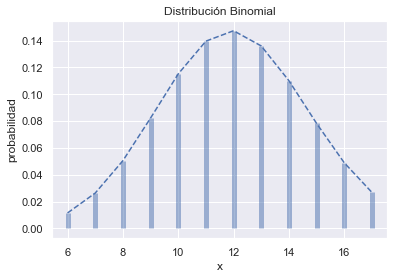

In [51]:
# Graficando Binomial
N, p = 30, 0.4 # parametros de forma 
binomial = stats.binom(N, p) # Distribución
x = np.arange(binomial.ppf(0.01),
              binomial.ppf(0.99))
fmp = binomial.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('x')
plt.show()

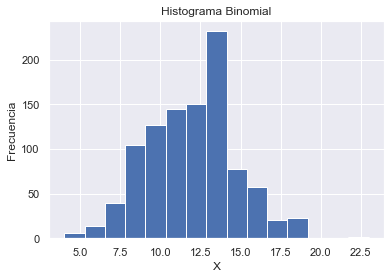

In [52]:
# Creacion de un histograma
binom_sim = binomial.rvs(1000)  # genera 1000 numeros aleatorios
plt.hist(binom_sim, bins=15)
plt.ylabel('Frecuencia')
plt.xlabel('X')
plt.title('Histograma Binomial')
plt.show()

<a id="section11"></a>
## <font color="#004D7F">Distribución de Poisson </font>

Si $\lambda$ es un número real positivo, se dice que una
variable aleatoria X tiene distribución Poisson de parámetro $\lambda$ si su función de densidad está
dada por la fórmula:

$$f(x)=\frac{\lambda ^x e^{-\lambda}}{x!}$$


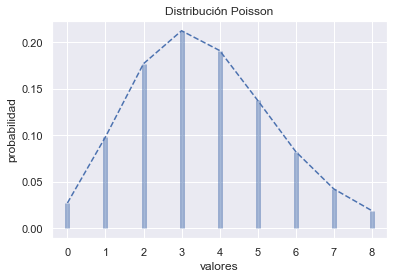

In [54]:
# Graficando Poisson
l =  3.6 # parametro de forma 
poisson = stats.poisson(l) # Distribución
x = np.arange(poisson.ppf(0.01),
              poisson.ppf(0.99))
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

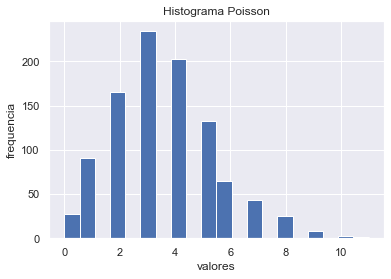

In [55]:
# histograma
aleatorios = poisson.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Poisson')
plt.show()


<a id="section11"></a>
## <font color="#004D7F">Distribución continua Uniforme en (a, b) </font>

Se dice que una variable aleatoria X tiene distribución uniforme en el intervalo (a, b) si su función de densidad está dada por la fórmula:

$$  f(x; a,b)=\frac{1}{b-a}$$

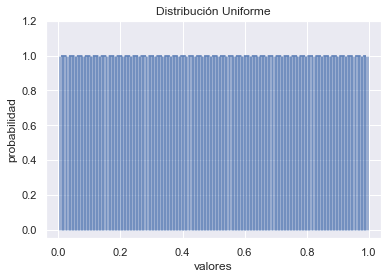

In [56]:
# Graficando Uniforme
uniforme = stats.uniform()
x = np.linspace(uniforme.ppf(0.01),
                uniforme.ppf(0.99), 100)
fp = uniforme.pdf(x) # Función de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fp, '--')
ax.vlines(x, 0, fp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2])
plt.title('Distribución Uniforme')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

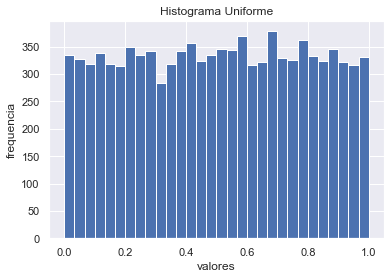

In [60]:
# histograma
aleatorios = uniforme.rvs(10000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 30)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Uniforme')
plt.show()

<a id="section11"></a>
## <font color="#004D7F">Distribución Normal </font>

La Distribución Normal o Gaussiana, es aplicable a un amplio rango de problemas y es la distribución más utilizada en estadística. Su función de densidad esta dada por la formula:

$$
\phi(x;\mu, \sigma^2) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-1}{2}\left(\frac{x - \mu}{\sigma} \right)^2}
$$

Por ejemplo, a continuación se declara una variable aleatoria $X \sim N(\mu=3,\sigma^2=16)$. Luego, calculamos $f_{X}(x)$ y $F_{X}(x)$. Nota: verificar de acuerdo al módulo utilizado si el segundo parámetro de una Normal es la varianza $\sigma^2$. Por ejemplo, en scipy el segundo parámetro es la desviación estándar.

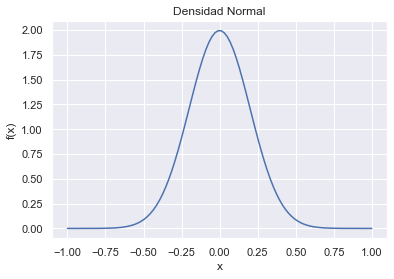

In [62]:
# Graficando la densidad Normal

mu, sigma = 0, 0.2 # media y desviacion estandar
normal = stats.norm(mu, sigma)
#x = np.linspace(normal.ppf(0.0001),
#                normal.ppf(0.9999), 1000)
x = np.linspace(-1,1, 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Densidad Normal')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

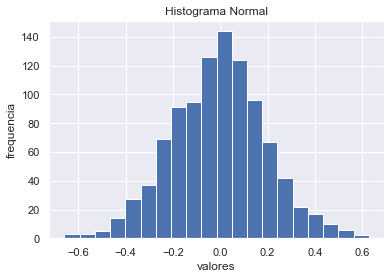

In [64]:
# Histograma de valores de una Normal
aleatorios = normal.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Normal')
plt.show()

https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/#:~:text=La%20Distribuci%C3%B3n%20Poisson%20esta%20dada,a%20una%20velocidad%20constante%20%CE%BC.

INTRODUCCIÓN A LA TEORÍA DE LA PROBABILIDAD, VOL. 1 Miguel Angel García Alvarez
